### Homework 03 - Programming and critical analysis (ist1102082, ist1103252)


Exercise 1)
Loading the data from the csv file and converting it into a dataframe

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

X = df.drop('quality', axis=1)
y = df['quality']

# Set the MLPRegressor parameters
activation = "relu"  # Rectified Linear Unit (ReLU) activation
residuals = []



Perform a Multi Layer Perceptron Regression using the given parameters

In [8]:
# Set the MLPRegressor parameters
activation = "relu"  # Rectified Linear Unit (ReLU) activation
residuals = []

# Perform 10 runs with different random states and collect residuals
for random_state in range(1, 11):
    # Split the dataset into a training and test set with a fixed seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Create an MLP Regressor with the specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation=activation, 
                                validation_fraction=0.2, random_state=random_state)
    
    # Train the MLP regressor
    mlp_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = mlp_regressor.predict(X_test)
    
    # Calculate residuals (absolute errors)
    residuals.extend(np.abs(y_test - y_pred))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

##### Plot the distribution of residuals using a histogram

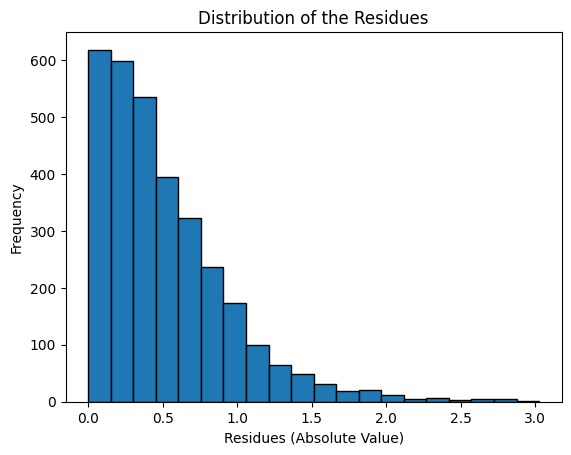

In [9]:
# Plot the distribution of residuals using a histogram
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Distribution of the Residues")
plt.xlabel("Residues (Absolute Value)")
plt.ylabel("Frequency")
plt.show()

Exercise 2)
